In [1]:
import pandas as pd #imports python libraries
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset
import seaborn as sns
import matplotlib.ticker as mticker #formating module
from adjustText import adjust_text #fixes text overlap on graphs

ds = load_dataset("lukebarousse/data_jobs") #imports data
df = ds['train'].to_pandas() #imports data inot python

df

/opt/anaconda3/envs/py_env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [2]:
df["job_skills"]= df["job_skills"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x) # cleans job skills

df_ds = df[(df['job_country'] == "United States") & (df["job_title_short"] == "Data Scientist")] # filters for specific job and country

df_ds_exploded = df_ds.explode("job_skills") # creates a row for each skill in a job posting

skill_count = df_ds_exploded["job_skills"].value_counts() # counts job postings by skill

df_count = pd.DataFrame(skill_count).dropna() #converts to dataframe

skill_pay  = df_ds_exploded.groupby("job_skills")['salary_year_avg'].median().sort_values(ascending=False) #calculates median salary per skill

df_pay = pd.DataFrame(skill_pay).dropna() # converts to data frame and deletes NaN rows

df_skill = df_count.merge(df_pay, on="job_skills").sort_values(ascending=False, by="count") #merges two dataframes into one

df_skills = df_skill.reset_index() # cleans index/columns

df_skills

,job_skills,count,salary_year_avg
0,python,42379,131867.0
1,sql,30034,134500.0
2,r,26022,126000.0
3,sas,14340,120000.0
4,tableau,13859,125000.0
...,...,...,...
176,groovy,8,135000.0
177,erlang,7,113500.0
178,svelte,5,99150.0
179,qt,4,110000.0


In [50]:
pareto_frontier = [] #building an empty tuple that we will append later

max_salary_so_far = -float('inf') #sets the first salary to negative infinity so that any salary with count 0 will be included

for _, row in df_skills.iterrows(): #iterates thhrough each row from highest to lowest count
    skill = row["job_skills"]
    count = row["count"]
    salary = row["salary_year_avg"]
    if salary > max_salary_so_far: #if the salary of the currently iterated row is grater than the greatest previous salary then...
        pareto_frontier.append((skill, count, salary)), #this row is added to the pareto tuple
        max_salary_so_far = salary #the greatest salary is updted in order to function through the next iteration

df_pareto = pd.DataFrame(pareto_frontier) #tuple is transformed into a dataframe

df_pareto.rename(columns={0: "skills", 1: "count", 2: "salary"}, inplace=True) #dataframe clean up

df_pareto

,skills,count,salary
0,python,42379,131867.0
1,sql,30034,134500.0
2,spark,9890,135959.5
3,tensorflow,7039,149646.0
4,pytorch,5508,150000.0
5,airflow,1166,157000.0
6,neo4j,572,157500.0
7,theano,252,165000.0
8,hugging face,202,179000.0
9,slack,172,180000.0


/var/folders/bw/hyhwy085297517x3641dn4d80000gn/T/ipykernel_1005/3097748573.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


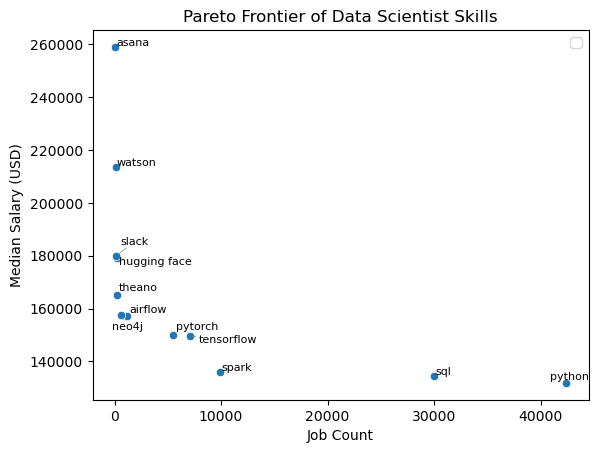

In [51]:
fig, ax = plt.subplots() #basic matplotlib/seaborn scatter plot

sns.scatterplot(data=df_pareto, x="count", y="salary")

from adjustText import adjust_text

texts = []
for i, row in df_pareto.iterrows():
    texts.append(plt.text(row["count"], row["salary"], row["skills"], fontsize=8))

adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))


plt.xlabel("Job Count")
plt.ylabel("Median Salary (USD)")
plt.title("Pareto Frontier of Data Scientist Skills")
plt.legend()
plt.show()